<font size=14>Stock Price Predictor</font>

Description: The project aims to predict future stock prices of a company (e.g., Google) by leveraging a combination of technical indicators, such as the Relative Strength Index (RSI), historical data, & market sentiment analysis derived from news articles. The prediction model employs a Long Short-Term Memory (LSTM) neural network.

In [109]:
import pandas as pd 
import math
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from bs4 import BeautifulSoup
plt.style.use('seaborn-v0_8')

In [110]:
start = '2014-01-01'
end = '2024-08-08'
stock_name = 'GOOG'

df = yf.download(stock_name,start,end)

[*********************100%%**********************]  1 of 1 completed


In [111]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...
2024-08-01,171.979996,175.679993,170.509995,172.449997,172.449997,17177800
2024-08-02,168.190002,170.210007,166.389999,168.399994,168.399994,18907800
2024-08-05,157.369995,165.940002,156.600006,160.639999,160.639999,34907800


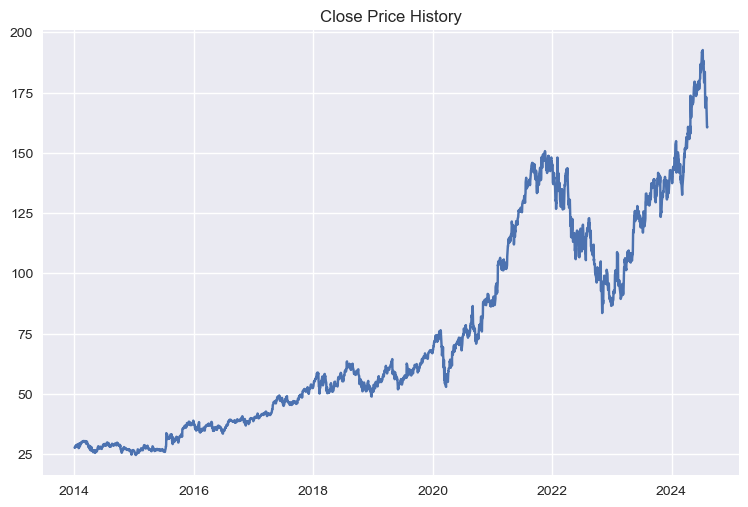

In [112]:
plt.title('Close Price History')
plt.plot(df['Close'])
plt.show()

In [113]:
#Replacing the date index to default
df.reset_index(inplace=True)
#Isolating close prices
data = df.filter(['Close'])

<font size=6>Calculating RSI</font>

In [114]:
#Calculating RSI for predicting overbought/oversold stocks
window_length = 14
delta = data['Close'].diff().dropna()
loss = delta.copy()
gains = delta.copy()

gains[gains < 0] = 0
loss[loss > 0] = 0

#Using ewm(Exponential moving average) instead of sma as this smoothes the gains and losses.
#It gives more weight to recent price changes and less to the older ones
gain_ewm = gains.ewm(com=window_length - 1, adjust=False).mean()
loss_ewm = abs(loss.ewm(com=window_length - 1, adjust=False).mean())

RS = gain_ewm / loss_ewm
RSI = 100 - 100 / (1 + RS)
data['RSI'] = RSI
data['RSI'].fillna(0,inplace = True)
data[-20:]

,Close,RSI
Date,,
2024-07-11,187.300003,57.823823
2024-07-12,186.779999,56.718466
2024-07-15,188.190002,59.006731
2024-07-16,185.500000,53.225258
2024-07-17,182.619995,47.822735
2024-07-18,179.220001,42.356721
2024-07-19,179.389999,42.709312
2024-07-22,183.350006,50.330895
2024-07-23,183.600006,50.776106


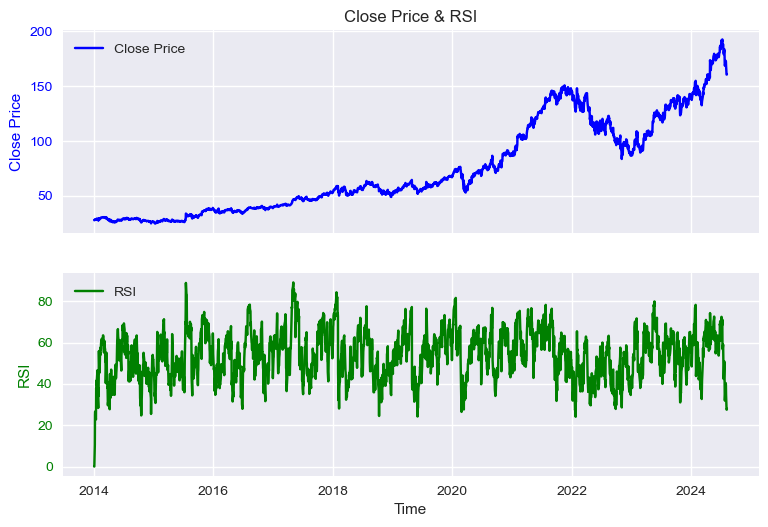

In [115]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(data['Close'], color='blue', label='Close Price')
ax1.set_ylabel('Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Close Price & RSI")

ax2.plot(data['RSI'], color='green', label='RSI')
ax2.set_ylabel('RSI', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_xlabel('Time')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show()

<font size=6>Web Scraping Financial News</font>